In [1]:
import torch
import matplotlib.pyplot as plt
import sys

sys.path.append("../")
from utils.Sen2_RDSR import (
    Sen2RDSR
)
from utils.loaddata import (
    Sentinel2Dataset
)


In [2]:
# create model
model = Sen2RDSR()


im10 shape: torch.Size([1, 4, 32, 32])
im20 shape: torch.Size([1, 6, 32, 32])
target20 shape: torch.Size([1, 2, 32, 32])
torch.Size([1, 6, 32, 32]) torch.Size([1, 2, 32, 32])


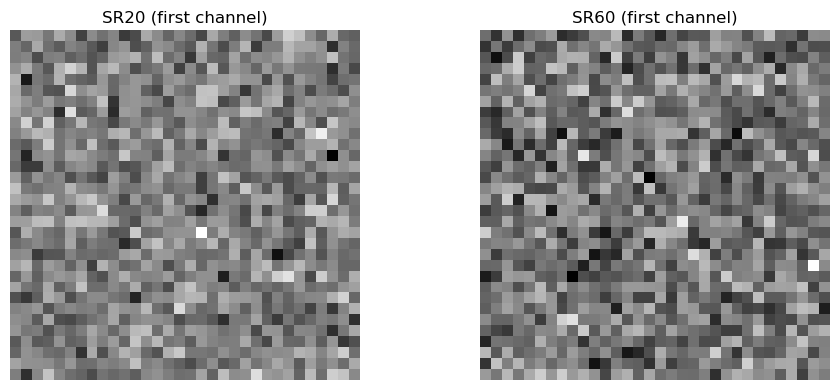

In [3]:

#print(model)
# Dummy input tensors
im10 = torch.randn(1, 4, 32, 32)       # HR bands at 10m
im20 = torch.randn(1, 6, 32, 32)        # 20m bands
im60 = torch.randn(1, 2, 32, 32)        # 60m bands

print(f"im10 shape: {im10.shape}")
print(f"im20 shape: {im20.shape}")
print(f"target20 shape: {im60.shape}")

sr20, sr60 = model(im10, im20, im60)
print(sr20.shape, sr60.shape)  # Expect [1, 6, 60, 60] and [1, 2, 60, 60]

# Plot the first channel of sr20 and sr60 as images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("SR20 (first channel)")
plt.imshow(sr20[0, 0].detach().cpu().numpy(), cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("SR60 (first channel)")
plt.imshow(sr60[0, 0].detach().cpu().numpy(), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### DATALOADER

In [8]:
dataset20 = Sentinel2Dataset(dataset_type="20train")
print(f"Dataset length: {len(dataset20)}")

Loading 20train data from ../data/train
Found 1 samples
Normalizing images...
Normalization complete.
Dataset length: 8000


im10 shape: torch.Size([4, 32, 32])
im20 shape: torch.Size([6, 32, 32])
im60 shape: torch.Size([0])
target20 shape: torch.Size([6, 32, 32])
im60 shape: torch.Size([0])
target60 shape: torch.Size([0])


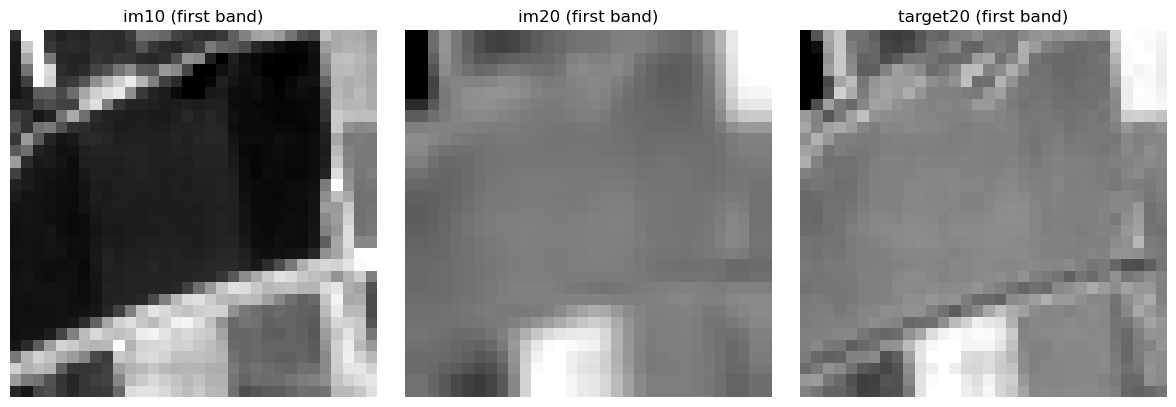

In [9]:


im10, im20, im60, target20, target60 = dataset20[0]
print(f"im10 shape: {im10.shape}")
print(f"im20 shape: {im20.shape}")
print(f"im60 shape: {im60.shape}")
print(f"target20 shape: {target20.shape}")
print(f"im60 shape: {im60.shape}")
print(f"target60 shape: {target60.shape}")

# Plot one image from each dataset tuple to check data is correctly loaded
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("im10 (first band)")
plt.imshow(im10[1].cpu().numpy(), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("im20 (first band)")
plt.imshow(im20[1].cpu().numpy(), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("target20 (first band)")
plt.imshow(target20[1].cpu().numpy(), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


In [10]:
dataset60 = Sentinel2Dataset(dataset_type="60train")
print(f"Dataset length: {len(dataset60)}")

Loading 60train data from ../data/train60
Found 1 samples
Normalizing images...
Normalization complete.
Dataset length: 500


im10 shape: torch.Size([4, 96, 96])
im20 shape: torch.Size([6, 96, 96])
target20 shape: torch.Size([0])
im60 shape: torch.Size([2, 96, 96])
target60 shape: torch.Size([2, 96, 96])


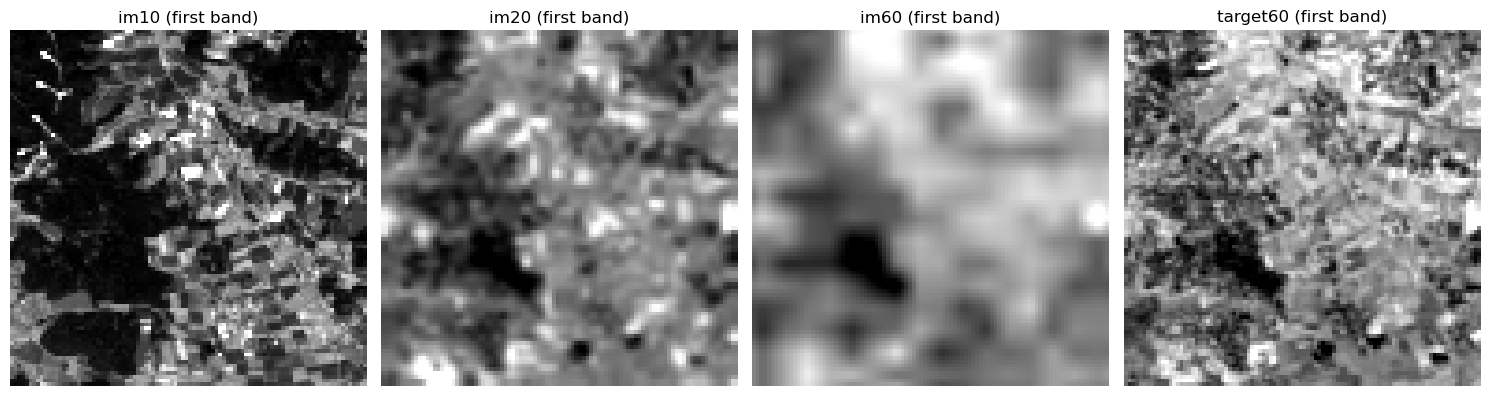

In [13]:
# Print shapes of im10, im20, target20, im60, target60

im10, im20, im60, target20, target60 = dataset60[0]
print(f"im10 shape: {im10.shape}")
print(f"im20 shape: {im20.shape}")
print(f"target20 shape: {target20.shape}")
print(f"im60 shape: {im60.shape}")
print(f"target60 shape: {target60.shape}")

# Plot one image from each dataset tuple to check data is correctly loaded
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.title("im10 (first band)")
plt.imshow(im10[1].cpu().numpy(), cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("im20 (first band)")
plt.imshow(im20[1].cpu().numpy(), cmap='gray')
plt.axis('off')


plt.subplot(1, 4, 3)
plt.title("im60 (first band)")
if im60.numel() > 0:
    plt.imshow(im60[1].cpu().numpy(), cmap='gray')
else:
    plt.text(0.5, 0.5, "Empty", ha='center', va='center')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("target60 (first band)")
if target60.numel() > 0:
    plt.imshow(target60[1].cpu().numpy(), cmap='gray')
else:
    plt.text(0.5, 0.5, "Empty", ha='center', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()